In [2]:
%load_ext autoreload
%autoreload 2

In [17]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sys
import smote_variants as sv
from pathlib import Path
sys.path.append(str(Path.cwd().parents[1]))
from handle_data import HandleData
from handle_results import HandleResults
from sv_synthsonic import synthsonic
from evaluate_oversampler_cross_val import cross_validation
from imblearn.over_sampling import RandomOverSampler, SMOTE, SMOTENC, SVMSMOTE, ADASYN, BorderlineSMOTE

In [4]:
HD = HandleData()
CV = cross_validation()
HR = HandleResults()

In [5]:
home_folder = Path.cwd().parents[1]
plot_folder = home_folder.joinpath(home_folder, 'Plots')
path = home_folder.joinpath(home_folder, 'CSV_results')
df_info = pd.read_csv(path.joinpath('dataset_info.csv'))
df = pd.read_csv(path.joinpath('Cross_validation', 'Cross_validation.csv'), index_col=0)

In [131]:
df_info

,dataset,size,features,numerical_features,categorical_features,majority,minority,type,imbalance_ratio
0,ecoli,336.0,7.0,5.0,2.0,301.0,35.0,mixed,0.116279
1,optical_digits,5620.0,64.0,0.0,64.0,5066.0,554.0,categorical,0.109356
2,satimage,6435.0,36.0,36.0,0.0,5809.0,626.0,numerical,0.107764
3,pen_digits,10992.0,16.0,16.0,0.0,9937.0,1055.0,numerical,0.106169
4,abalone,4177.0,10.0,7.0,3.0,3786.0,391.0,mixed,0.103275
5,sick_euthyroid,3163.0,42.0,6.0,36.0,2870.0,293.0,mixed,0.102091
6,spectrometer,531.0,93.0,93.0,0.0,486.0,45.0,numerical,0.092593
7,car_eval_34,1728.0,21.0,0.0,21.0,1594.0,134.0,categorical,0.084065
8,isolet,7797.0,617.0,610.0,7.0,7197.0,600.0,mixed,0.083368
9,us_crime,1994.0,100.0,99.0,1.0,1844.0,150.0,mixed,0.081345


In [150]:
HR.select_best(df, 'pr_auc').loc[df.oversampler.isin(['synthsonic','SMOTE']),
['dataset','oversampler','proportion','pr_auc']].sort_values('pr_auc')

,dataset,oversampler,proportion,pr_auc
88,abalone_19,synthsonic,0.4,0.026058
67,abalone_19,SMOTE,0.2,0.058582
1142,yeast_ml8,SMOTE,0.2,0.094937
1158,yeast_ml8,synthsonic,0.8,0.103502
265,coil_2000,synthsonic,0.2,0.136468
844,solar_flare_m0,SMOTE,1.0,0.145078
243,coil_2000,SMOTE,0.6,0.145493
855,solar_flare_m0,synthsonic,0.4,0.159680
21,abalone,SMOTE,0.2,0.289701
43,abalone,synthsonic,0.6,0.290365


In [110]:
def get_pr(X,y, o, proportion) :
    pr, rc, thr = CV.calculate_pr_curve(X,y,name,o,proportion)
    aucscore = auc(rc,pr).round(3)
    
    return pr, rc, thr, aucscore

# Wine-quality

In [124]:
name = 'wine_quality'
X,y,title = HD.load_data(name)

In [129]:
oversampler = synthsonic()
wq_synth_pr, wq_synth_rc, _, wq_synth_aucscore = get_pr(X,y, oversampler, proportion)

2021-08-18 12:49:42,797:INFO:synthsonic: Running sampling via ('synthsonic', "{'proportion': 0.6, 'distinct_threshold': -1, 'do_PCA': True, 'ordering': 'pca'}")
2021-08-18 12:49:42,797:INFO:synthsonic: Running sampling via ('synthsonic', "{'proportion': 0.6, 'distinct_threshold': -1, 'do_PCA': True, 'ordering': 'pca'}")
2021-08-18 12:49:42,797:INFO:synthsonic: Running sampling via ('synthsonic', "{'proportion': 0.6, 'distinct_threshold': -1, 'do_PCA': True, 'ordering': 'pca'}")
n_quantiles (500) is greater than the total number of samples (137). n_quantiles is set to num samples.
Building tree: 100%|██████████| 45/45.0 [00:00<00:00, 1411.34it/s]
Generating for node: 7: 100%|██████████| 11/11 [00:00<00:00, 15.33it/s]
2021-08-18 12:49:49,276:INFO:synthsonic: Running sampling via ('synthsonic', "{'proportion': 0.6, 'distinct_threshold': -1, 'do_PCA': True, 'ordering': 'pca'}")
2021-08-18 12:49:49,276:INFO:synthsonic: Running sampling via ('synthsonic', "{'proportion': 0.6, 'distinct_thres

In [126]:
oversampler = sv.NoSMOTE()
wq_no_pr, wq_no_rc, _, wq_no_aucscore = get_pr(X,y, oversampler, proportion)

2021-08-18 12:49:28,254:INFO:NoSMOTE: Running sampling via ('NoSMOTE', '{}')
2021-08-18 12:49:28,254:INFO:NoSMOTE: Running sampling via ('NoSMOTE', '{}')
2021-08-18 12:49:28,254:INFO:NoSMOTE: Running sampling via ('NoSMOTE', '{}')
2021-08-18 12:49:28,381:INFO:NoSMOTE: Running sampling via ('NoSMOTE', '{}')
2021-08-18 12:49:28,381:INFO:NoSMOTE: Running sampling via ('NoSMOTE', '{}')
2021-08-18 12:49:28,381:INFO:NoSMOTE: Running sampling via ('NoSMOTE', '{}')
2021-08-18 12:49:28,508:INFO:NoSMOTE: Running sampling via ('NoSMOTE', '{}')
2021-08-18 12:49:28,508:INFO:NoSMOTE: Running sampling via ('NoSMOTE', '{}')
2021-08-18 12:49:28,508:INFO:NoSMOTE: Running sampling via ('NoSMOTE', '{}')
2021-08-18 12:49:28,632:INFO:NoSMOTE: Running sampling via ('NoSMOTE', '{}')
2021-08-18 12:49:28,632:INFO:NoSMOTE: Running sampling via ('NoSMOTE', '{}')
2021-08-18 12:49:28,632:INFO:NoSMOTE: Running sampling via ('NoSMOTE', '{}')


In [127]:
oversampler = SMOTE()
proportion = 0.2
wq_smote_pr, wq_smote_rc, _, wq_smote_aucscore = get_pr(X,y, oversampler, proportion)

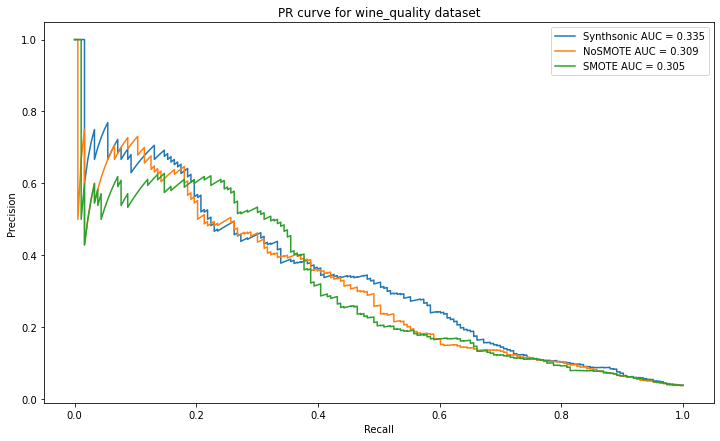

In [130]:
fig, ax = plt.subplots(figsize=(12,7))
ax.set_title(f'PR curve for {name} dataset')
ax.set_xlabel("Recall")
ax.set_ylabel('Precision')

ax.plot()
ax.plot(wq_synth_rc,wq_synth_pr, label=f'Synthsonic AUC = {wq_synth_aucscore}')
ax.plot(wq_no_rc, wq_no_pr, label=f'NoSMOTE AUC = {wq_no_aucscore}')
ax.plot(wq_smote_rc, wq_smote_pr, label=f'SMOTE AUC = {wq_smote_aucscore}')
ax.legend()

# Sick_euthyroid

In [139]:
name = 'sick_euthyroid'
X,y,title = HD.load_data(name)

In [140]:
oversampler = synthsonic()
proportion = 0.6
se_synth_pr, se_synth_rc, _, se_synth_aucscore = get_pr(X,y, oversampler, proportion)

2021-08-18 13:10:04,892:INFO:synthsonic: Running sampling via ('synthsonic', "{'proportion': 0.6, 'distinct_threshold': -1, 'do_PCA': True, 'ordering': 'pca'}")
2021-08-18 13:10:04,892:INFO:synthsonic: Running sampling via ('synthsonic', "{'proportion': 0.6, 'distinct_threshold': -1, 'do_PCA': True, 'ordering': 'pca'}")
2021-08-18 13:10:04,892:INFO:synthsonic: Running sampling via ('synthsonic', "{'proportion': 0.6, 'distinct_threshold': -1, 'do_PCA': True, 'ordering': 'pca'}")
n_quantiles (500) is greater than the total number of samples (219). n_quantiles is set to num samples.
Building tree: 100%|██████████| 820/820.0 [00:00<00:00, 1006.20it/s]
Generating for node: 4: 100%|██████████| 42/42 [00:00<00:00, 160.00it/s] 
2021-08-18 13:10:17,374:INFO:synthsonic: Running sampling via ('synthsonic', "{'proportion': 0.6, 'distinct_threshold': -1, 'do_PCA': True, 'ordering': 'pca'}")
2021-08-18 13:10:17,374:INFO:synthsonic: Running sampling via ('synthsonic', "{'proportion': 0.6, 'distinct_t

In [141]:
oversampler = sv.NoSMOTE()
se_no_pr, se_no_rc, _, se_no_aucscore = get_pr(X,y, oversampler, proportion)

2021-08-18 13:10:56,053:INFO:NoSMOTE: Running sampling via ('NoSMOTE', '{}')
2021-08-18 13:10:56,053:INFO:NoSMOTE: Running sampling via ('NoSMOTE', '{}')
2021-08-18 13:10:56,053:INFO:NoSMOTE: Running sampling via ('NoSMOTE', '{}')
2021-08-18 13:10:56,199:INFO:NoSMOTE: Running sampling via ('NoSMOTE', '{}')
2021-08-18 13:10:56,199:INFO:NoSMOTE: Running sampling via ('NoSMOTE', '{}')
2021-08-18 13:10:56,199:INFO:NoSMOTE: Running sampling via ('NoSMOTE', '{}')
2021-08-18 13:10:56,343:INFO:NoSMOTE: Running sampling via ('NoSMOTE', '{}')
2021-08-18 13:10:56,343:INFO:NoSMOTE: Running sampling via ('NoSMOTE', '{}')
2021-08-18 13:10:56,343:INFO:NoSMOTE: Running sampling via ('NoSMOTE', '{}')
2021-08-18 13:10:56,500:INFO:NoSMOTE: Running sampling via ('NoSMOTE', '{}')
2021-08-18 13:10:56,500:INFO:NoSMOTE: Running sampling via ('NoSMOTE', '{}')
2021-08-18 13:10:56,500:INFO:NoSMOTE: Running sampling via ('NoSMOTE', '{}')


In [142]:
oversampler = SMOTE()
proportion = 0.6
se_smote_pr, se_smote_rc, _, se_smote_aucscore = get_pr(X,y, oversampler, proportion)

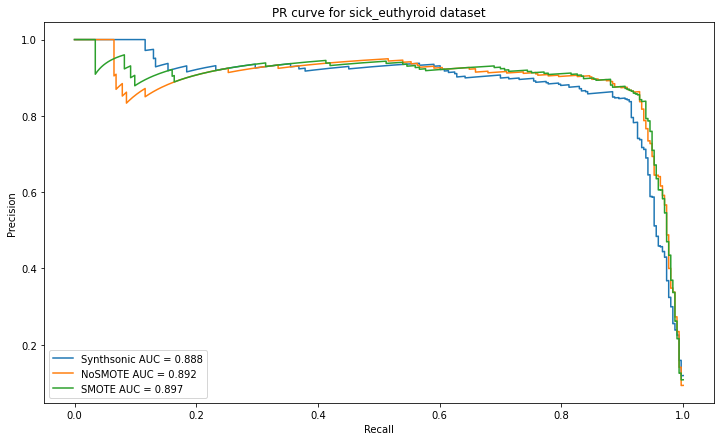

In [143]:
fig, ax = plt.subplots(figsize=(12,7))
ax.set_title(f'PR curve for {name} dataset')
ax.set_xlabel("Recall")
ax.set_ylabel('Precision')

ax.plot()
ax.plot(se_synth_rc,se_synth_pr, label=f'Synthsonic AUC = {se_synth_aucscore}')
ax.plot(se_no_rc, se_no_pr, label=f'NoSMOTE AUC = {se_no_aucscore}')
ax.plot(se_smote_rc, se_smote_pr, label=f'SMOTE AUC = {se_smote_aucscore}')
ax.legend()

# Satimage

In [144]:
name = 'satimage'
X,y,title = HD.load_data(name)

In [145]:
oversampler = synthsonic()
proportion = 0.6
sa_synth_pr, sa_synth_rc, _, sa_synth_aucscore = get_pr(X,y, oversampler, proportion)

2021-08-18 13:28:26,410:INFO:synthsonic: Running sampling via ('synthsonic', "{'proportion': 0.6, 'distinct_threshold': -1, 'do_PCA': True, 'ordering': 'pca'}")
2021-08-18 13:28:26,410:INFO:synthsonic: Running sampling via ('synthsonic', "{'proportion': 0.6, 'distinct_threshold': -1, 'do_PCA': True, 'ordering': 'pca'}")
2021-08-18 13:28:26,410:INFO:synthsonic: Running sampling via ('synthsonic', "{'proportion': 0.6, 'distinct_threshold': -1, 'do_PCA': True, 'ordering': 'pca'}")
n_quantiles (500) is greater than the total number of samples (470). n_quantiles is set to num samples.
Building tree: 100%|██████████| 595/595.0 [00:00<00:00, 972.92it/s] 
Generating for node: 11: 100%|██████████| 36/36 [00:02<00:00, 14.18it/s]
2021-08-18 13:28:53,977:INFO:synthsonic: Running sampling via ('synthsonic', "{'proportion': 0.6, 'distinct_threshold': -1, 'do_PCA': True, 'ordering': 'pca'}")
2021-08-18 13:28:53,977:INFO:synthsonic: Running sampling via ('synthsonic', "{'proportion': 0.6, 'distinct_th

In [146]:
oversampler = sv.NoSMOTE()
sa_no_pr, sa_no_rc, _, sa_no_aucscore = get_pr(X,y, oversampler, proportion)

2021-08-18 13:30:14,663:INFO:NoSMOTE: Running sampling via ('NoSMOTE', '{}')
2021-08-18 13:30:14,663:INFO:NoSMOTE: Running sampling via ('NoSMOTE', '{}')
2021-08-18 13:30:14,663:INFO:NoSMOTE: Running sampling via ('NoSMOTE', '{}')
2021-08-18 13:30:14,904:INFO:NoSMOTE: Running sampling via ('NoSMOTE', '{}')
2021-08-18 13:30:14,904:INFO:NoSMOTE: Running sampling via ('NoSMOTE', '{}')
2021-08-18 13:30:14,904:INFO:NoSMOTE: Running sampling via ('NoSMOTE', '{}')
2021-08-18 13:30:15,171:INFO:NoSMOTE: Running sampling via ('NoSMOTE', '{}')
2021-08-18 13:30:15,171:INFO:NoSMOTE: Running sampling via ('NoSMOTE', '{}')
2021-08-18 13:30:15,171:INFO:NoSMOTE: Running sampling via ('NoSMOTE', '{}')
2021-08-18 13:30:15,512:INFO:NoSMOTE: Running sampling via ('NoSMOTE', '{}')
2021-08-18 13:30:15,512:INFO:NoSMOTE: Running sampling via ('NoSMOTE', '{}')
2021-08-18 13:30:15,512:INFO:NoSMOTE: Running sampling via ('NoSMOTE', '{}')


In [147]:
oversampler = SMOTE()
proportion = 0.6
sa_smote_pr, sa_smote_rc, _, sa_smote_aucscore = get_pr(X,y, oversampler, proportion)

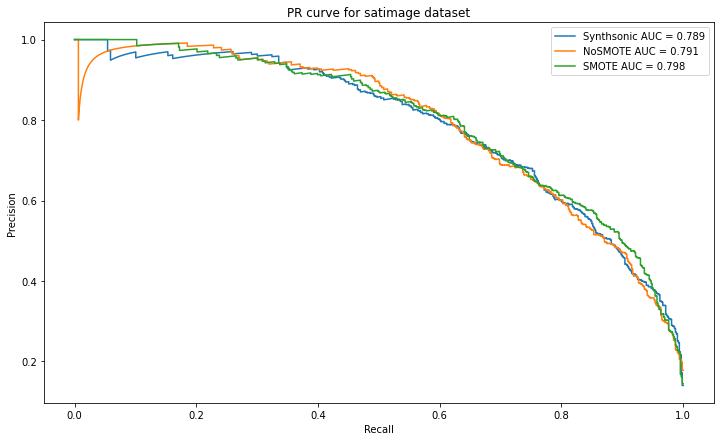

In [148]:
fig, ax = plt.subplots(figsize=(12,7))
ax.set_title(f'PR curve for {name} dataset')
ax.set_xlabel("Recall")
ax.set_ylabel('Precision')

ax.plot()
ax.plot(sa_synth_rc,sa_synth_pr, label=f'Synthsonic AUC = {sa_synth_aucscore}')
ax.plot(sa_no_rc, sa_no_pr, label=f'NoSMOTE AUC = {sa_no_aucscore}')
ax.plot(sa_smote_rc, sa_smote_pr, label=f'SMOTE AUC = {sa_smote_aucscore}')
ax.legend()

# mammography

In [153]:
name = 'mammography'
X,y,title = HD.load_data(name)

In [154]:
oversampler = synthsonic()
proportion = 0.6
ma_synth_pr, ma_synth_rc, _, ma_synth_aucscore = get_pr(X,y, oversampler, proportion)

2021-08-18 14:05:36,495:INFO:synthsonic: Running sampling via ('synthsonic', "{'proportion': 0.6, 'distinct_threshold': -1, 'do_PCA': True, 'ordering': 'pca'}")
2021-08-18 14:05:36,495:INFO:synthsonic: Running sampling via ('synthsonic', "{'proportion': 0.6, 'distinct_threshold': -1, 'do_PCA': True, 'ordering': 'pca'}")
2021-08-18 14:05:36,495:INFO:synthsonic: Running sampling via ('synthsonic', "{'proportion': 0.6, 'distinct_threshold': -1, 'do_PCA': True, 'ordering': 'pca'}")
n_quantiles (500) is greater than the total number of samples (195). n_quantiles is set to num samples.
Building tree: 100%|██████████| 10/10.0 [00:00<00:00, 7536.93it/s]
Generating for node: 4: 100%|██████████| 6/6 [00:00<00:00, 18.67it/s]
2021-08-18 14:05:40,171:INFO:synthsonic: Running sampling via ('synthsonic', "{'proportion': 0.6, 'distinct_threshold': -1, 'do_PCA': True, 'ordering': 'pca'}")
2021-08-18 14:05:40,171:INFO:synthsonic: Running sampling via ('synthsonic', "{'proportion': 0.6, 'distinct_thresho

In [155]:
oversampler = sv.NoSMOTE()
ma_no_pr, ma_no_rc, _, ma_no_aucscore = get_pr(X,y, oversampler, proportion)

2021-08-18 14:05:51,953:INFO:NoSMOTE: Running sampling via ('NoSMOTE', '{}')
2021-08-18 14:05:51,953:INFO:NoSMOTE: Running sampling via ('NoSMOTE', '{}')
2021-08-18 14:05:51,953:INFO:NoSMOTE: Running sampling via ('NoSMOTE', '{}')
2021-08-18 14:05:52,185:INFO:NoSMOTE: Running sampling via ('NoSMOTE', '{}')
2021-08-18 14:05:52,185:INFO:NoSMOTE: Running sampling via ('NoSMOTE', '{}')
2021-08-18 14:05:52,185:INFO:NoSMOTE: Running sampling via ('NoSMOTE', '{}')
2021-08-18 14:05:52,412:INFO:NoSMOTE: Running sampling via ('NoSMOTE', '{}')
2021-08-18 14:05:52,412:INFO:NoSMOTE: Running sampling via ('NoSMOTE', '{}')
2021-08-18 14:05:52,412:INFO:NoSMOTE: Running sampling via ('NoSMOTE', '{}')
2021-08-18 14:05:52,656:INFO:NoSMOTE: Running sampling via ('NoSMOTE', '{}')
2021-08-18 14:05:52,656:INFO:NoSMOTE: Running sampling via ('NoSMOTE', '{}')
2021-08-18 14:05:52,656:INFO:NoSMOTE: Running sampling via ('NoSMOTE', '{}')


In [156]:
oversampler = SMOTE()
proportion = 0.6
ma_smote_pr, ma_smote_rc, _, ma_smote_aucscore = get_pr(X,y, oversampler, proportion)

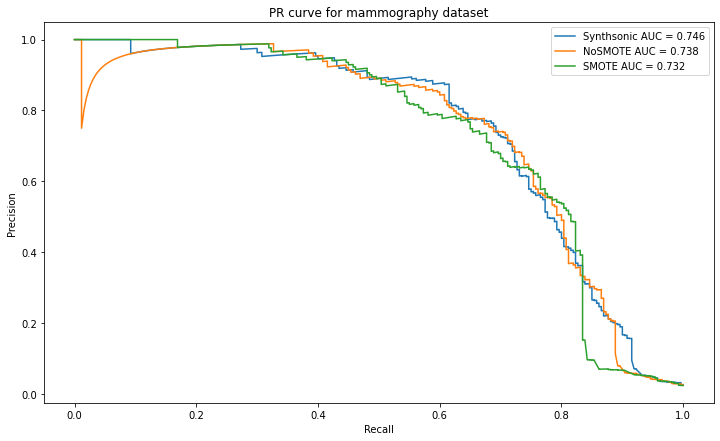

In [157]:
fig, ax = plt.subplots(figsize=(12,7))
ax.set_title(f'PR curve for {name} dataset')
ax.set_xlabel("Recall")
ax.set_ylabel('Precision')

ax.plot()
ax.plot(ma_synth_rc,ma_synth_pr, label=f'Synthsonic AUC = {ma_synth_aucscore}')
ax.plot(ma_no_rc, ma_no_pr, label=f'NoSMOTE AUC = {ma_no_aucscore}')
ax.plot(ma_smote_rc, ma_smote_pr, label=f'SMOTE AUC = {ma_smote_aucscore}')
ax.legend()
plt.savefig()

# Optical_digits

In [158]:
name = 'optical_digits'
X,y,title = HD.load_data(name)

In [159]:
oversampler = synthsonic()
proportion = 0.6
op_synth_pr, op_synth_rc, _, op_synth_aucscore = get_pr(X,y, oversampler, proportion)

2021-08-18 14:44:07,807:INFO:synthsonic: Running sampling via ('synthsonic', "{'proportion': 0.6, 'distinct_threshold': -1, 'do_PCA': True, 'ordering': 'pca'}")
2021-08-18 14:44:07,807:INFO:synthsonic: Running sampling via ('synthsonic', "{'proportion': 0.6, 'distinct_threshold': -1, 'do_PCA': True, 'ordering': 'pca'}")
2021-08-18 14:44:07,807:INFO:synthsonic: Running sampling via ('synthsonic', "{'proportion': 0.6, 'distinct_threshold': -1, 'do_PCA': True, 'ordering': 'pca'}")
n_quantiles (500) is greater than the total number of samples (416). n_quantiles is set to num samples.
Building tree: 100%|██████████| 1953/1953.0 [00:02<00:00, 936.49it/s]
Generating for node: 54:  23%|██▎       | 15/64 [00:04<00:11,  4.26it/s]/Users/tristenmarto/anaconda3/lib/python3.7/site-packages/pgmpy/factors/discrete/DiscreteFactor.py:522: UserWarning: Found unknown state name. Trying to switch to using all state names as state numbers
  "Found unknown state name. Trying to switch to using all state name

In [160]:
oversampler = sv.NoSMOTE()
op_no_pr, op_no_rc, _, op_no_aucscore = get_pr(X,y, oversampler, proportion)

2021-08-18 14:45:34,103:INFO:NoSMOTE: Running sampling via ('NoSMOTE', '{}')
2021-08-18 14:45:34,103:INFO:NoSMOTE: Running sampling via ('NoSMOTE', '{}')
2021-08-18 14:45:34,103:INFO:NoSMOTE: Running sampling via ('NoSMOTE', '{}')
2021-08-18 14:45:34,336:INFO:NoSMOTE: Running sampling via ('NoSMOTE', '{}')
2021-08-18 14:45:34,336:INFO:NoSMOTE: Running sampling via ('NoSMOTE', '{}')
2021-08-18 14:45:34,336:INFO:NoSMOTE: Running sampling via ('NoSMOTE', '{}')
2021-08-18 14:45:34,565:INFO:NoSMOTE: Running sampling via ('NoSMOTE', '{}')
2021-08-18 14:45:34,565:INFO:NoSMOTE: Running sampling via ('NoSMOTE', '{}')
2021-08-18 14:45:34,565:INFO:NoSMOTE: Running sampling via ('NoSMOTE', '{}')
2021-08-18 14:45:34,792:INFO:NoSMOTE: Running sampling via ('NoSMOTE', '{}')
2021-08-18 14:45:34,792:INFO:NoSMOTE: Running sampling via ('NoSMOTE', '{}')
2021-08-18 14:45:34,792:INFO:NoSMOTE: Running sampling via ('NoSMOTE', '{}')


In [162]:
oversampler = SMOTE()
proportion = 0.6
op_smote_pr, op_smote_rc, _, op_smote_aucscore = get_pr(X,y, oversampler, proportion)

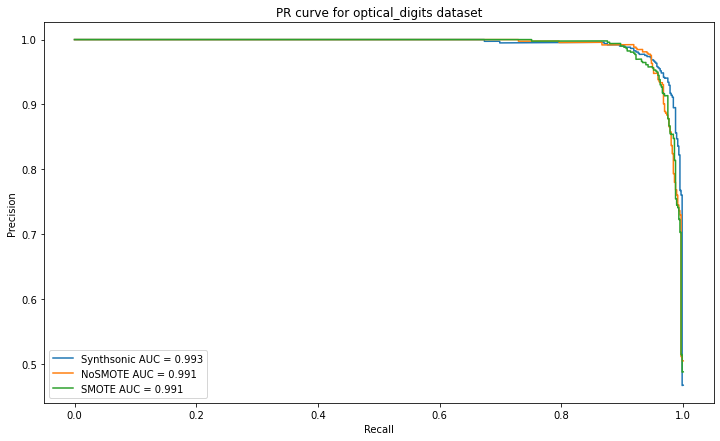

In [164]:
fig, ax = plt.subplots(figsize=(12,7))
ax.set_title(f'PR curve for {name} dataset')
ax.set_xlabel("Recall")
ax.set_ylabel('Precision')

ax.plot()
ax.plot(op_synth_rc,op_synth_pr, label=f'Synthsonic AUC = {op_synth_aucscore}')
ax.plot(op_no_rc, op_no_pr, label=f'NoSMOTE AUC = {op_no_aucscore}')
ax.plot(op_smote_rc, op_smote_pr, label=f'SMOTE AUC = {op_smote_aucscore}')
ax.legend()